<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-introduction-to-SOFMs" data-toc-modified-id="An-introduction-to-SOFMs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An introduction to SOFMs</a></span></li><li><span><a href="#Architecture" data-toc-modified-id="Architecture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Architecture</a></span><ul class="toc-item"><li><span><a href="#Topology" data-toc-modified-id="Topology-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Topology</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training</a></span></li></ul></li><li><span><a href="#Application:-Clustering-similar-faces" data-toc-modified-id="Application:-Clustering-similar-faces-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Application: Clustering similar faces</a></span><ul class="toc-item"><li><span><a href="#Obtaining-the-source-dataset" data-toc-modified-id="Obtaining-the-source-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Obtaining the source dataset</a></span></li><li><span><a href="#Setting-up-the-SOFM-network" data-toc-modified-id="Setting-up-the-SOFM-network-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Setting up the SOFM network</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Identifying-clusters" data-toc-modified-id="Identifying-clusters-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Identifying clusters</a></span></li><li><span><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Visualizing the results</a></span></li><li><span><a href="#Visualizing-cluster-size" data-toc-modified-id="Visualizing-cluster-size-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Visualizing cluster size</a></span></li><li><span><a href="#Visualizing-adjacency-(U-matrix)" data-toc-modified-id="Visualizing-adjacency-(U-matrix)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Visualizing adjacency (U-matrix)</a></span></li></ul></li><li><span><a href="#The-effect-of-network-parameters" data-toc-modified-id="The-effect-of-network-parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The effect of network parameters</a></span><ul class="toc-item"><li><span><a href="#Low-Density-Asymmetric-Net-(15x25)" data-toc-modified-id="Low-Density-Asymmetric-Net-(15x25)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Low Density Asymmetric Net (15x25)</a></span></li><li><span><a href="#High-Density-Symmetric-Net-(40x40)" data-toc-modified-id="High-Density-Symmetric-Net-(40x40)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>High Density Symmetric Net (40x40)</a></span></li><li><span><a href="#Superhigh-Resolution-Map-(100x100)" data-toc-modified-id="Superhigh-Resolution-Map-(100x100)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Superhigh Resolution Map (100x100)</a></span></li><li><span><a href="#Mid-resolution-map-(25x25)-with-different-learning-parameters" data-toc-modified-id="Mid-resolution-map-(25x25)-with-different-learning-parameters-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mid-resolution map (25x25) with different learning parameters</a></span></li><li><span><a href="#The-effect-of-training-time-(epochs)-on-a-30x30-model" data-toc-modified-id="The-effect-of-training-time-(epochs)-on-a-30x30-model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>The effect of training time (epochs) on a 30x30 model</a></span></li></ul></li></ul></div>

# Self-organising Feature Maps (Kohonen networks)

## An introduction to SOFMs

Self-organising maps (SOMs, sometimes Self-Organising Feature Maps) or Kohonen layers (named after their inventor, Finnish computer scientist Teuvo Kohonen) are an unsupervised classification algorithm that reduces the dimensionality of a given data set – typically to two dimensions. In that sense, it is very close to clustering but, as we will see, much more sophisticated. In theory, Kohonen networks are neural networks, but in practice, they diverge just enough to make things confusing if neural network terminology is overused. Therefore, I will largely eschew the usual talk about activation functions and layers and leave it at this: **Kohonen networks can create a two-dimensional representation of unlabelled data using a neural network**. While the algorithm itself is not a classification algorithm or a clustering algorithm the way, say, kNN is, its results can be transformed to act as such.

While self-organising maps are regarded as a blast from the past (they were invented in the mid-1990s, when a good part of today's deep learning practitioners weren't even born yet!), they find utility from time to time for three simple reasons: they're much easier to implement than most other topological data analysis algorithm, they can be an impressively powerful method of data preprocessing and they can give an intuitive feel of the data that otherwise would elude the analyst. With the advent of efficient modern libraries like Tensorflow and the availability of massively parallel computing power using GPUs, **there's never been a better time to get the most out of the ability of Kohonen networks to add semantic understanding to our data**. 

## Architecture

A Kohonen network has a very particular structure, consisting of an input layer (red) and a map layer (blue). Unlike most neural networks, where it's conventional to draw data flowing from left to right, in a Kohonen network, the convention of putting the input layer to the bottom has emerged, and we'll be following this tradition here as well. More importantly, the map layer has a **meaningful topology**.

<img src="assets/kohonen.png" width="300px">

_Fig. 1. A typical Kohonen network with a $4 \times 4$ map layer and three input neurons. The map layer can be described as an $m \times n$ layer in the discrete $\mathbb{Z}^{2}$ space (since every neuron can be defined by their $m$ and $n$ coordinates $N_{i, j} \mid i \in m, j \in n$) and the input layer as $\mathbb{R}^3$._

### Topology

What do we mean by a **meaningful topology**? As you can see above, every neuron in the map layer is connected to its neighbouring neurons only. Therefore, the position of neurons matters. For this reason, we need to have a way to describe the topology of a particular Kohonen network. We will do so using the following (not necessarily entirely canonical) definition:

\begin{definition}\label{def:kohonen_network} **Kohonen networks**

A Kohonen network is a morphism that takes a real valued continuous input vector of dimensionality $\delta$, and maps it to an $m \times n$  sized representation in the discrete $\mathbb{Z}^2$ space. It therefore reduces the dimensionality by mapping a $\delta$-dimensional input vector to a 2-dimensional feature map. In other words,

$$ f_{M}:\mathbb{R}^{\delta}\to M^{m \times n} $$

A map $M^{m \times n}$, consists of $m \cdot n$ neurons. For the sake of simplicity, a neuron $N$ is in $M$ if the following criteria are met:

$$ N(x, y) \in M^{m \times n} \iff x \in m \land y \in n $$

In that case, the neuron $N(x, y) \in M^{m \times n}$ can be described with the shorthand $M_{x, y}$.

Each neuron has a weight vector, with the same dimensionality as the input vector (i.e. $\delta$). Again for the sake of convenience, we will denote the weight vector of the neuron $M_{x, y}$ as $\mathbf{\hat{m}}_{x, y}$. The value of $\mathbf{\hat{m}}_{x, y}$ at time $t$ is described as $\mathbf{\hat{m}}_{x, y}(t)$.

\end{definition}

The image above shows a non-toroidal Kohonen network, where each neuron has two, three or four directly connected neighbouring nodes. However, toroidal Kohonen networks exist, in which edge nodes are connected.

\begin{definition}\label{def:toroidal_network} **Toroidal Kohonen map**

A two-dimensional toroidal Kohonen network is a Kohonen map $M^{m \times n}$, for which it holds that for any value $i \in m$ and $j \in n$,

* $M_{i, n}$ connects to $M_{i, 1}$; and

* $M_{m, j}$ connects to $M_{1, j}$.

\end{definition}

With this, we can begin to discuss how a Kohonen map is trained.

### Training

Let $M^{m \times n}$ be a Kohonen map of $\delta$ input neurons. Let $I$ be a $\delta \times h$ matrix consisting of the input data, where $h$ is the number of rows.

1. First, values need to be initialised for the weight vectors of all neurons. For all neurons $M_{i, j} \in M$, the corresponding $\delta$-element weight vector $\mathbf{\hat{m}}_{i, j}(t = 0)$ is initialised. This may consist of random values, as Kohonen initially proposed, or, if the data set exhibits quasi-linearity, with principal components.

2. At iteration $t$, a $\delta$-element vector $\mathbf{v}_t$ is drawn from $I$.

3. For each neuron $M_{i, j}$, the Euclidean distance between the neuron's weight vector $\mathbf{m}_{i, j} (t - 1)$ and $\mathbf{v}_t$ is calculated – that is, the error $D_{i, j}$ of the neuron $M_{i, j}$ is defined as 

\begin{equation}
    \label{eq:errfx} 
        D_{i, j} = \Delta_E(\mathbf{v}_t, \mathbf{m}_{i, j} (t-1))
\end{equation} 

where $\Delta_E(\mathbf{p}, \mathbf{q})$ is the Euclidean distance between two $\delta$-element vectors $\mathbf{p}$ and $\mathbf{q}$.

4. The neuron $M_{p, q}$ with the lowest $D_{p, q}$ is designated as the best-performing neuron (BPU).

5. The entire map is updated. For each neuron $M_{u, v}$, the weight vector $\mathbf{m}_{u, v}$ is recalculated for step $t + 1$, so that \begin{equation}\label{eq:update_formula}
    \mathbf{m}_{u, v}(t + 1) = \mathbf{\hat{m}}_{u, v}(t) + \theta(M_{i, j}, M_{u, v}, t) \cdot \mu(t) \cdot (\mathbf{v}_{t + 1} - \mathbf{\hat{m}}_{u, v}(t)) \end{equation}, where

    - $\theta(M_{i, j}, M_{u, v}, t)$ is a neighbourhood function (more about that later) at time $t$,
    
    - $\mu(t)$ is a monotonically decreasing learning rate, and
    
    - $\mathbf{v}_{t + 1}$ is the next row drawn from $I$.
    
6. This is typically iterated until a given number of iterations (sometimes described as the bound $\lambda$) is reached. The same rows (vectors) of source data may be processed multiple times, because they may help refine a model that is by then in a very different state than it was when the value was last used, so $\lambda$ may be $> h$.

## Application: Clustering similar faces

This is a somewhat unusual task in that we're asking the SOFM here to arrange a number of photos from a data set (the famous Olivetti Faces data set, comprising 10 photos each of 40 employees of AT&T Labs, Cambridge, MA, in different poses and lighting) in an order that arranges them so that the dissimilarity between each face and its neighbours is minimised. The contemporary way of solving this problem would require computationally costly vector embeddings, whereas the SOFM approach is not only computationally cheap, it's also quite elegant.

In [1]:
from __future__ import division
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
from neupy import algorithms, environment
import numpy as np
from skimage import io
from sklearn import datasets, preprocessing
from tqdm import tqdm_notebook as tqdm

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Obtaining the source dataset

The source dataset is linked in the `sklearn.datasets` module, but may have to be downloaded into cache at first use. This may take some time. This is a labelled dataset, but we are only interested in `data`, the raw imagery, and not the class labels.

In [3]:
faces = datasets.fetch_olivetti_faces()['data']

In [4]:
faces.shape

(400, 4096)

Inspection reveals that this is stored as a 400x4096 matrix, where the images themselves are stretched-out 64x64 matrices of 256 pixel values. We can visualize a face by selecting its row, then reshaping it to a 64x64 square matrix:

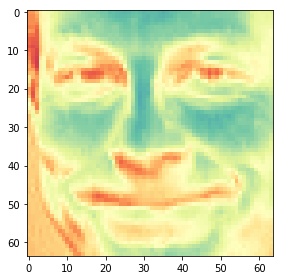

In [5]:
face_123 = faces[123, :].reshape((64, 64))
io.imshow(face_123, cmap="Spectral")

### Setting up the SOFM network

The main parameter of a SOFM network is its topology, i.e. the dimensions of the grid. If we wish to use the SOFM as a clustering algorithm creating $n$ points representing distinct clusters of data, then the 1-by-n topology is best. However, for the kind of dynamic clustering we are looking for, it's best to create a square topology, with the product of height and width neurons being at least twice the number of possible classes but still significantly smaller than the number of individual samples. In this case, a 10-by-10 square topology is a good start.

In [6]:
GRID_HEIGHT = 10
GRID_WIDTH = 10

The other significant settings will be the learning radius (`learning_radius`) and learning radius decay rate (`reduce_radius_after`). Learning radius denotes the 'locality' of a learning effect. For instance, if a neuron is moved, how big a neighbourhood should move with it – and how fast should this value decrease? These are set by the following two constants.

In [7]:
LEARNING_RADIUS = 5
LEARNING_RADIUS_DECAY = 10

In [8]:
environment.reproducible()

sofm_10x10 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(GRID_HEIGHT, GRID_WIDTH),
    learning_radius=LEARNING_RADIUS,
    reduce_radius_after=LEARNING_RADIUS_DECAY,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [10, 10]
[OPTION] grid_type = rect
[OPTION] learning_radius = 5
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)



### Training the model

We're now ready to train the model on the data set! Initially, let's start with 100 iterations (double click on the bar below the next cell to unfold training statistics).

In [9]:
sofm_10x10.train(faces, epochs=100)


Start training

[TRAINING DATA] shapes: (400, 4096)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.12009 |           - |       1 sec |
|           2 |     0.10995 |           - |       1 sec |
|           3 |     0.11035 |           - |       1 sec |
|           4 |     0.10893 |           - |       1 sec |
|           5 |     0.10924 |           - |       1 sec |
|           6 |     0.10933 |           - |       1 sec |
|           7 |     0.10929 |           - |       1 sec |
|           8 |     0.10919 |           - |       1 sec |
|           9 |     0.10931 |           - |       1 sec |
|          10 |      0.1053 |           - |       1 sec |
|          11 |     0.10544 |           - |       1 sec |
|          12 |      0.1056 |           - |       1 sec |
|          13 |     0.10479 |           - |    

### Identifying clusters

We then create a 400-length array, which assigns to each face image the most likely cluster numbers. Clusters are 'named' sequentially. We can also determine the number of distinct clusters:

In [10]:
def cluster_by_sofm(sofm, source_data):
    return sofm.predict(source_data).argmax(axis=1)


def calculate_number_of_clusters(sofm, source_data):
    return len(set(cluster_by_sofm(sofm, source_data)))


clusters = cluster_by_sofm(sofm_10x10, faces)
number_of_clusters = calculate_number_of_clusters(sofm_10x10, faces)

print(f"Number of clusters: {number_of_clusters}")

Number of clusters: 98


### Visualizing the results

One way of visualising the results would be to show where the neurons representing each cluster are on a 10-by-10 grid, and display for each neuron a photo that exemplifies a cluster for which that neuron is the best responder. 

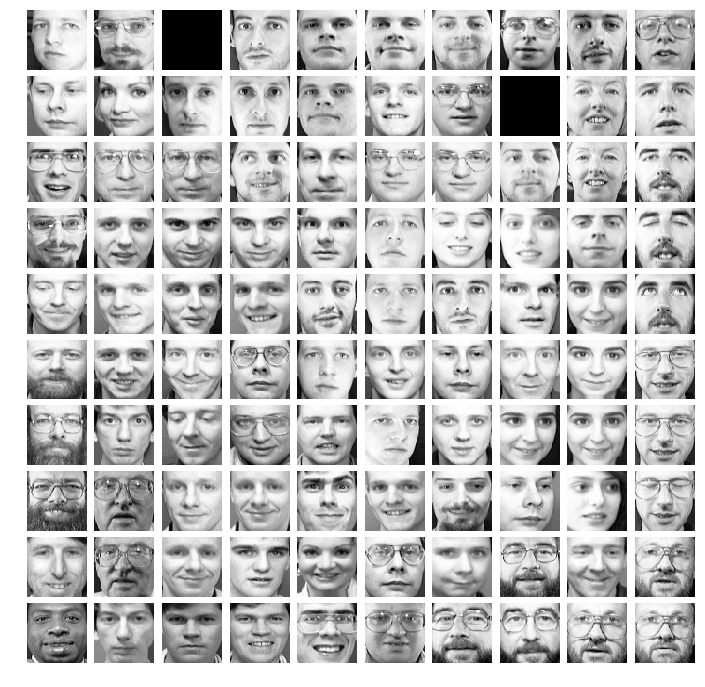

In [11]:
def visualise_sofm_images(sofm, images):
    grid_height, grid_width = sofm.features_grid

    clusters = sofm.predict(images).argmax(axis=1)
    number_of_clusters = len(set(clusters))

    plt.figure(figsize=(12, 12 * (grid_height / grid_width)))

    plt.axis("off")

    grid = gridspec.GridSpec(grid_height, grid_width)
    grid.update(wspace=0.1, hspace=0.1)

    for idx in tqdm(range(grid_height * grid_width)):
        ax = plt.subplot(grid[idx])
        ax.axis("off")

        cluster_content = faces[clusters == idx]

        if len(cluster_content) > 0:
            sample = cluster_content[0].reshape(64, 64)
        else:
            sample = np.zeros((64, 64))

        ax.imshow(sample, "Greys_r", interpolation="nearest")

    return plt


sofm_10x10_visualised = visualise_sofm_images(sofm_10x10, faces)

plt.show(sofm_10x10_visualised)

That's promising – quite obviously, similar faces are closer to each other, such as the 'glasses corner' in the right lower fringe corner. There are two things we do not know, however:

1. How big is each cluster, i.e. how many images belong to each group? We only see the first image of each cluster.

2. This visualisation does only give us an approximation of how far each face is from others, as it's constrained to a discrete space. Can we quantify this better?

Let's solve these in the following.

### Visualizing cluster size

The heatmap we're generating below iterates over each of the cluster 'bins', and assigns to it a colour representing the number of faces comprised in it.

In [12]:
def cluster_counts(sofm, source_data):
    grid_height, grid_width = sofm.features_grid

    clusters = sofm.predict(source_data).argmax(axis=1)

    res = np.zeros((grid_height * grid_width))

    for idx, val in enumerate(clusters):
        res[val] += 1

    return res

In [13]:
cluster_counts(sofm_10x10, faces)

array([ 2.,  4.,  0.,  1.,  5.,  2.,  6.,  5.,  2., 10.,  5.,  3.,  4.,
        6.,  3.,  1.,  3.,  0.,  3.,  5.,  4.,  4.,  7.,  3.,  5.,  3.,
        4.,  1.,  7.,  6.,  4.,  1.,  3.,  8.,  5.,  3.,  5.,  2.,  5.,
        2.,  2.,  4.,  3.,  7.,  2.,  2.,  3.,  7.,  1.,  2.,  3.,  4.,
        4.,  3.,  2.,  3.,  6.,  2.,  4.,  1.,  5.,  5.,  2.,  5.,  8.,
        3.,  4.,  2.,  1.,  7.,  5.,  7.,  3.,  3.,  6.,  4.,  6.,  3.,
        3.,  2.,  6.,  3.,  1., 10.,  6.,  2., 10.,  4.,  3.,  2., 10.,
        9.,  5.,  5.,  4.,  5.,  1.,  5.,  4.,  4.])

This creates a map counting the number of members in each cluster (wrapped into a single vector):

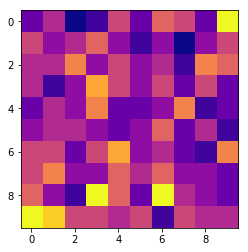

In [14]:
plt.figure(figsize=(4, 4))
plt.imshow(
    cluster_counts(sofm_10x10, faces).reshape((GRID_HEIGHT, GRID_WIDTH)),
    "plasma")
plt.show()

We can now use this to tint the previous map, so that faces will be coloured depending on the size of the corresponding cluster. Dark blues show clusters with relatively small counts, light yellows show more densely populated clusters.

In [52]:
def create_cluster_size_map(sofm, data, base_size = 12):
    grid_height, grid_width = sofm.features_grid

    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_counts = min_max_scaler.fit_transform(
        cluster_counts(sofm, data).reshape(-1, 1))
    heat_bitmap = cm.plasma(scaled_counts)
    plt.figure(figsize=(base_size, base_size * (grid_height / grid_width)))

    plt.suptitle(f"{grid_height}x{grid_width} SOFM – Cluster size map")

    grid = gridspec.GridSpec(grid_height, grid_width)
    grid.update(wspace=0.1, hspace=0.1)

    for idx in tqdm(range(grid_height * grid_width)):
        bitmap_colour = heat_bitmap[idx][0]
        cluster_content = faces[clusters == idx]

        if len(cluster_content) > 0:
            sample = cluster_content[0]
            is_img = True
        else:
            sample = np.zeros((64, 64))

        ax = plt.subplot(grid[idx])
        ax.axis('off')

        im2 = np.zeros((64, 64, 4))
        im2[:, :, 0] = np.full((64, 64), heat_bitmap[idx][0][0])
        im2[:, :, 1] = np.full((64, 64), heat_bitmap[idx][0][1])
        im2[:, :, 2] = np.full((64, 64), heat_bitmap[idx][0][2])
        im2[:, :, 3] = np.full((64, 64), 1.0)

        if is_img:
            im1 = sample.reshape((64, 64))
            ax.imshow(im1, cmap='Greys_r', interpolation='nearest', alpha=0.7)

        ax.imshow(im2, alpha=0.5)

    return plt


plt.show()

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

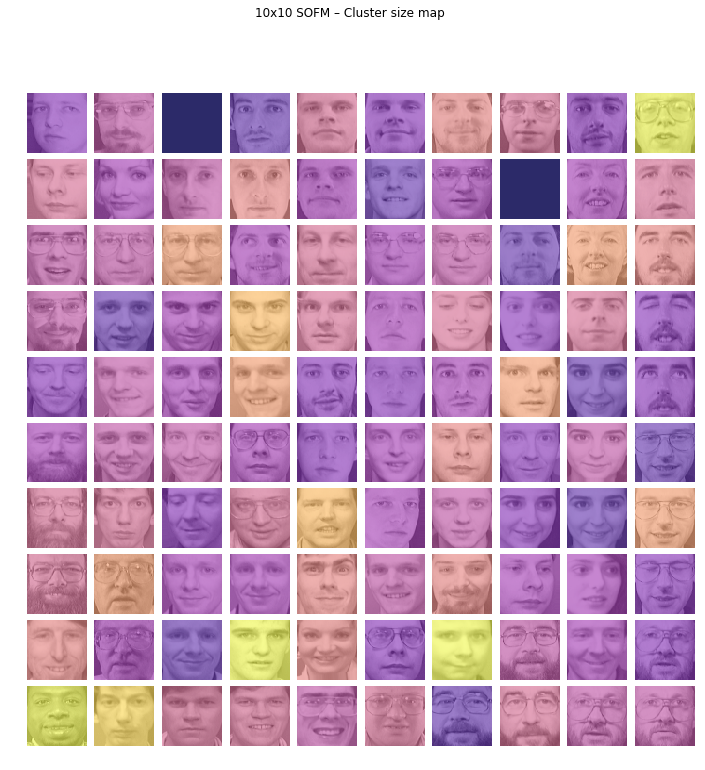

In [53]:
create_cluster_size_map(sofm_10x10, faces)

### Visualizing adjacency (U-matrix)

The U-matrix ([unified distance matrix](https://en.wikipedia.org/wiki/U-matrix)) in SOFMs represents the relative distance of nodes from its adjacent neighbourhood, for a given neighbourhood definition.

\begin{definition}\label{def:umatrix}
Let $M$ be the map layer of a self-organising map represented as a matrix. Let $\epsilon \ (i, j)$ return an $n$-length array of coordinates in $M$. Then, the U-matrix of $M$ is the matrix $U$ so that

\begin{equation}\label{eq:umatrix}
U_{i, j} = \frac{1}{n} \sum_{k = 1}^{n} \epsilon \ (k_i, k_j)
\end{equation}


\end{definition}


Neighbourhoods can be defined in multiple ways. The most common way is the non-toroidal von Neumann neighbourhood:
    
\begin{definition}\label{def:nt-von-neumann}
Let $M$ be an $m \times n$ matrix. Then, the non-toroidal von Neumann neighbourhood of $M_{i, j}$ consists of $l = M_{i - 1, j}$, $r = M_{i + 1, j}$, $d = M_{i, j - 1}$, and $u = M_{i, j + 1}$ if within $M$. 
\end{definition}

In [54]:
def get_von_neumann_neighbourhood(grid_height, grid_width):
    von_neumann_grid = ((-1, 0), (0, -1), (1, 0), (0, 1))

    for neuron_x, neuron_y in product(range(grid_height), range(grid_width)):
        neighbours = []

        for shift_x, shift_y in von_neumann_grid:
            neighbour_x = neuron_x + shift_x
            neighbour_y = neuron_y + shift_y

            if 0 <= neighbour_x < grid_height and 0 <= neighbour_y < grid_width:
                neighbours.append((neighbour_x, neighbour_y))

        yield (neuron_x, neuron_y), neighbours

In the following segment, we'll iterate over von Neumann neighbourhoods (see _Definition 4_),and calculate for each point the average distance for each element of the SOFM's weight matrix. These will be placed in the U-matrix `u_matrix`, so that $U_{i,j}$ is the mean of $M_{i,j}$'s distance from each of its neighbours.

In [55]:
def calculate_u_matrix(sofm):
    grid_width, grid_height = sofm.features_grid

    u_matrix = np.zeros(sofm.features_grid)
    reshaped_weights = np.reshape(sofm.weight, (4096, grid_height, grid_width))

    for (n_x, n_y), neighbours in get_von_neumann_neighbourhood(
            grid_height, grid_width):
        sum_distance = 0

        neuron_weight = reshaped_weights[:, n_x, n_y]

        for (neighbour_x, neighbour_y) in neighbours:
            neighbour_weight = reshaped_weights[:, neighbour_x, neighbour_y]
            distance = np.linalg.norm(neuron_weight - neighbour_weight)
            sum_distance += distance

        avg_d = sum_distance / len(neighbours)
        u_matrix[n_y, n_x] = avg_d

    return u_matrix

In [56]:
u_matrix_10x10 = calculate_u_matrix(sofm_10x10)

We then use the previous method to first create a heatmap...

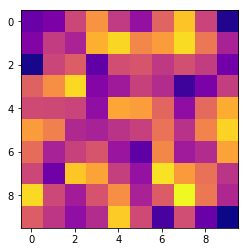

In [57]:
plt.figure(figsize=(4, 4))
plt.imshow(u_matrix_10x10, "plasma")
plt.show()

...then overlay it onto the photos:

In [58]:
def create_u_matrix_map(sofm, data, colour_map=cm.plasma, multiplier=1):
    grid_height, grid_width = sofm.features_grid

    min_max_scaler = preprocessing.MinMaxScaler()
    u_bitmap = colour_map(
        min_max_scaler.fit_transform(calculate_u_matrix(sofm))).reshape((-1,
                                                                         4))

    positions = list(product(range(grid_height), range(grid_width)))
    plt.figure(
        figsize=(multiplier * 12,
                 multiplier * 12 * (grid_height / grid_width)))

    plt.suptitle(f"{grid_height}x{grid_width} SOFM – U-matrix map")

    grid = gridspec.GridSpec(grid_height, grid_width)
    grid.update(wspace=0.1, hspace=0.1)

    for each in tqdm(range(grid_height * grid_width)):
        bitmap = u_bitmap[each]

        cluster_content = faces[clusters == each]

        if len(cluster_content) > 0:
            sample = cluster_content[0]
            is_img = True
        else:
            sample = np.zeros((64, 64))

        plt.subplot(grid[each])

        plt.axis('off')

        im2 = np.zeros((64, 64, 4))
        im2[:, :, 0] = np.full((64, 64), bitmap[0])
        im2[:, :, 1] = np.full((64, 64), bitmap[1])
        im2[:, :, 2] = np.full((64, 64), bitmap[2])
        im2[:, :, 3] = np.full((64, 64), 1.0)

        if is_img:
            im1 = sample.reshape((64, 64))
            plt.imshow(im1, cmap='Greys_r', interpolation='nearest', alpha=0.7)

        plt.imshow(im2, alpha=0.5)

    return plt

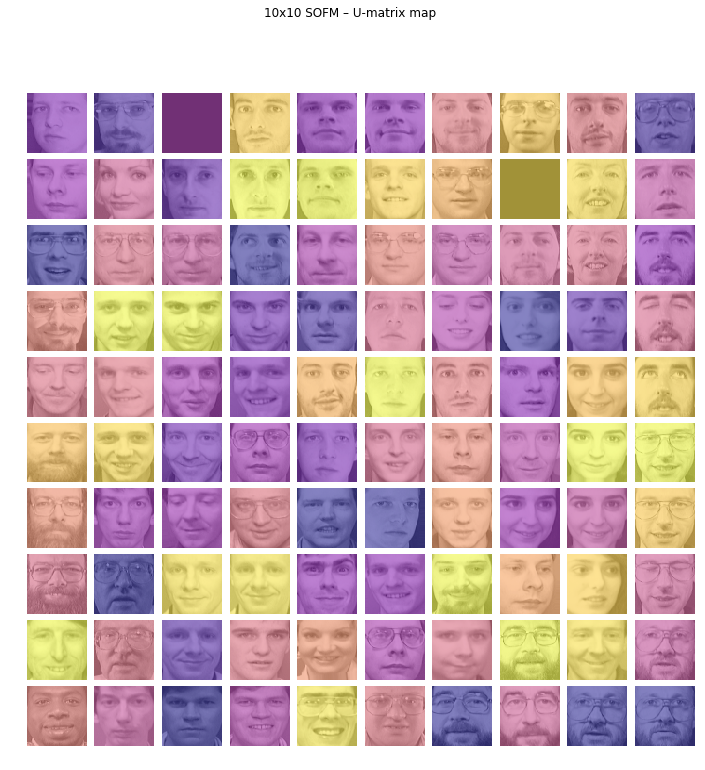

In [59]:
create_u_matrix_map(sofm_10x10, faces)
plt.show()

## The effect of network parameters

What if instead of a 10-by-10 network (where there is, on average, a neuron for every four photos), we would have gone with different network sizes – say, a more refined asymmetric net (10-by-20, covering half of the 400 individiual photos), a large symmetric net (60-by-60, nine times larger than the number of individual photos) or a superlarge net (100x100, 25 times larger than the photos)? The results are quite poignant.

### Low Density Asymmetric Net (15x25)

In [60]:
environment.reproducible()

sofm_10x20 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(10, 20),
    learning_radius=LEARNING_RADIUS,
    reduce_radius_after=LEARNING_RADIUS_DECAY,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [10, 20]
[OPTION] grid_type = rect
[OPTION] learning_radius = 5
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)



In [61]:
sofm_10x20.train(faces, epochs=50)


Start training

[TRAINING DATA] shapes: (400, 4096)
[TRAINING] Total epochs: 50

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |       0.116 |           - |       3 sec |
|           2 |     0.10365 |           - |       3 sec |
|           3 |     0.10445 |           - |       3 sec |
|           4 |     0.10412 |           - |       3 sec |
|           5 |     0.10324 |           - |       3 sec |
|           6 |     0.10229 |           - |       3 sec |
|           7 |     0.10258 |           - |       3 sec |
|           8 |     0.10289 |           - |       3 sec |
|           9 |     0.10406 |           - |       3 sec |
|          10 |     0.09953 |           - |       2 sec |
|          11 |    0.098843 |           - |       2 sec |
|          12 |     0.10036 |           - |       2 sec |
|          13 |    0.099283 |           - |     

Other than taking rather longer to train (by almost an order of magnitude despite only increasing the number of total nodes by a factor of 3.75), we notice a somewhat smaller and much more rapidly decreasing training error, falling under 0.045 after 100 iterations. Interestingly, the number of clusters remains exactly the same:

In [62]:
calculate_number_of_clusters(sofm_10x20, faces)

152

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

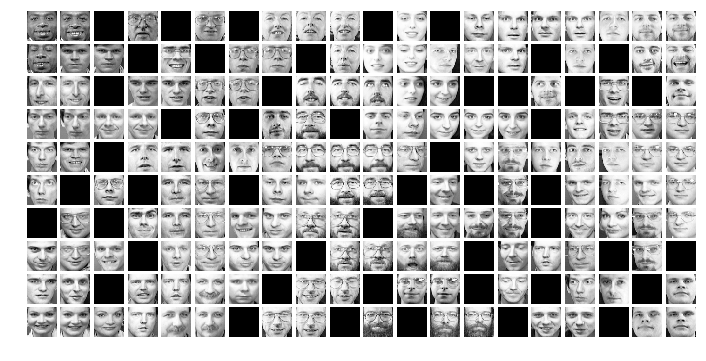

In [63]:
visualise_sofm_images(sofm_10x20, faces)

Often, a way of assessing a SOFM map layer's 'fitness' is by comparing the U-matrices of each. Let's see what the U-matrix of the 15x25 map layer looks like compared to the 10x10 map layer!

In [99]:
def u_matrix_compare(*sofms,
                     colour_map=cm.plasma,
                     show_LR=False,
                     show_step=False,
                     show_training_time=False):
    map_count = len(sofms)

    fig, axarr = plt.subplots(1, map_count)
    fig.set_figwidth(5 * map_count)
    fig.set_figheight(5)
    fig.suptitle("U-matrix comparison")
    u_matrices = [calculate_u_matrix(sofm) for sofm in sofms]
    dims = [(sofm.features_grid) for sofm in sofms]

    for idx in tqdm(range(map_count)):
        sofm = sofms[idx]
        axarr[idx].imshow(u_matrices[idx], cmap=colour_map)
        title = f"{dims[idx][0]}x{dims[idx][1]} SOFM"
        if show_LR:
            title += f" (LR: {sofm.learning_radius} | –1/{sofm.reduce_radius_after})"
        if show_step:
            title += f" (step: {sofm.step})"
        if show_training_time:
            title += f" @ {sofm.last_epoch} epochs"
        axarr[idx].set_title(title)

    fig.subplots_adjust(hspace=0.5)

    plt.show()

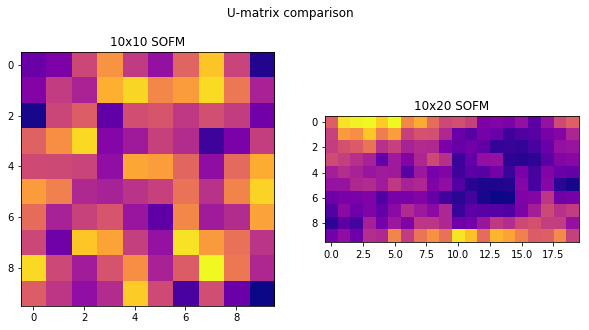

In [100]:
u_matrix_compare(sofm_10x10, sofm_10x20, colour_map=cm.plasma)

### High Density Symmetric Net (40x40)

In this net simulation, we'll be looking at the first net that will be largely sparse – the net size is 4 times that of the maximum number of clusters (the number of photos, i.e. 400). Here, we see that once unconstrained, a circular pattern emerges as the discretisation of position into a $\mathbb{Z}^{+^{2}}$ grid becomes less of an issue.

In [66]:
environment.reproducible()

sofm_40x40 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(40, 40),
    learning_radius=10,
    reduce_radius_after=10,
    step=2,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_40x40.train(faces, epochs=100)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 2
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [40, 40]
[OPTION] grid_type = rect
[OPTION] learning_radius = 10
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (400, 4096)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.13903 |           - |      56 sec |
|           2 |     0.12575 |           - |      53 sec |
|           3 |     0.12407 |           - |      55 sec |
|           4 |     0.12531 |           - |

Training has by now become quite slow, with over a minute per training epoch, but training error was remarkably low by the end. Comparative analysis of the U-matrices shows the sharp circular edge of the cluster as it delineates from unoccupied space:

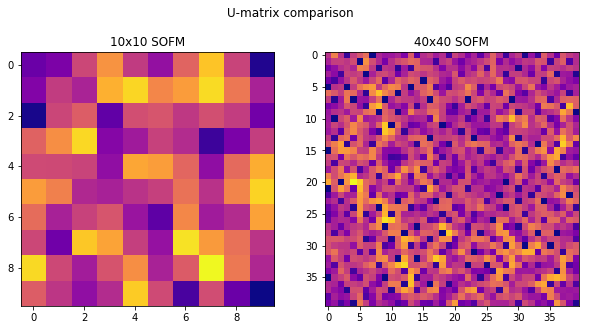

In [101]:
u_matrix_compare(sofm_10x10, sofm_40x40, colour_map=cm.plasma)

### Superhigh Resolution Map (100x100)

This map uses an extremely high resolution of 10,000 map layer neurons to create a very high resolution clustering. To accommodate this, the learning radius was increased.

In [87]:
environment.reproducible()

sofm_100x100 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(100, 100),
    learning_radius=30,
    reduce_radius_after=10,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_100x100.train(faces, epochs=100)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [100, 100]
[OPTION] grid_type = rect
[OPTION] learning_radius = 30
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (400, 4096)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.18852 |           - |       06:17 |
|           2 |     0.12976 |           - |       06:31 |
|           3 |     0.11804 |           - |       06:34 |
|           4 |     0.10998 |          

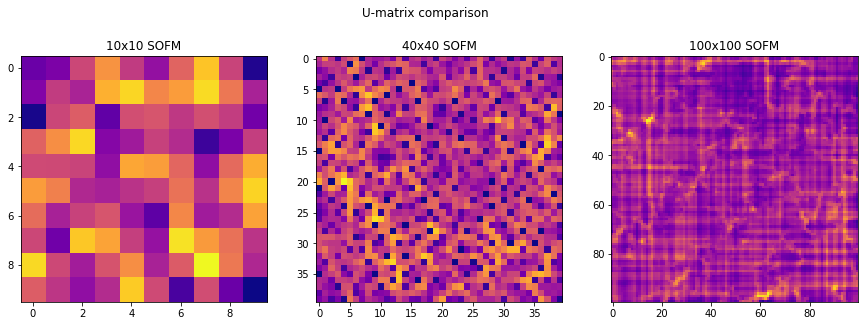

In [102]:
u_matrix_compare(sofm_10x10, sofm_40x40, sofm_100x100, colour_map=cm.plasma)

### Mid-resolution map (25x25) with different learning parameters

Map layer size is not the only significant parameter. The following is a mid-resolution map (25x25, slightly larger than the source data space), with three different learning radii over the same number of epochs. In each case, learning radius decay is every ten epochs.

In [104]:
environment.reproducible()

sofm_lr3 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(25, 25),
    learning_radius=3,
    reduce_radius_after=10,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_lr5 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(25, 25),
    learning_radius=5,
    reduce_radius_after=10,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_lr10 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(25, 25),
    learning_radius=15,
    reduce_radius_after=10,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_lr15 = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(25, 25),
    learning_radius=30,
    reduce_radius_after=10,
    step=0.5,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_lr3.train(faces, epochs=100)
sofm_lr5.train(faces, epochs=100)
sofm_lr10.train(faces, epochs=100)
sofm_lr15.train(faces, epochs=100)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [25, 25]
[OPTION] grid_type = rect
[OPTION] learning_radius = 3
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [25, 25]
[OPTION] grid_type = rect
[OPTION] learning_radius = 5
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION

|           1 |     0.13036 |           - |       7 sec |
|           2 |     0.10001 |           - |       7 sec |
|           3 |    0.095679 |           - |       7 sec |
|           4 |    0.094503 |           - |       7 sec |
|           5 |    0.093751 |           - |       7 sec |
|           6 |    0.094709 |           - |       7 sec |
|           7 |    0.094129 |           - |       7 sec |
|           8 |     0.09386 |           - |       7 sec |
|           9 |    0.093398 |           - |       7 sec |
|          10 |    0.090189 |           - |       6 sec |
|          11 |    0.089886 |           - |       6 sec |
|          12 |    0.089819 |           - |       6 sec |
|          13 |    0.089455 |           - |       6 sec |
|          14 |    0.089327 |           - |       6 sec |
|          15 |    0.089521 |           - |       6 sec |
|          16 |     0.08942 |           - |       6 sec |
|          17 |    0.088994 |           - |       6 sec |
|          18 

|          37 |     0.10527 |           - |      17 sec |
|          38 |     0.10483 |           - |      17 sec |
|          39 |     0.10517 |           - |      17 sec |
|          40 |     0.10394 |           - |      16 sec |
|          41 |     0.10325 |           - |      16 sec |
|          42 |     0.10435 |           - |      16 sec |
|          43 |     0.10381 |           - |      15 sec |
|          44 |     0.10375 |           - |      16 sec |
|          45 |     0.10363 |           - |      16 sec |
|          46 |     0.10325 |           - |      15 sec |
|          47 |     0.10409 |           - |      15 sec |
|          48 |     0.10381 |           - |      16 sec |
|          49 |     0.10305 |           - |      16 sec |
|          50 |     0.10192 |           - |      14 sec |
|          51 |     0.10173 |           - |      14 sec |
|          52 |      0.1017 |           - |      14 sec |
|          53 |     0.10152 |           - |      14 sec |
|          54 

|          91 |     0.11871 |           - |      31 sec |
|          92 |     0.11912 |           - |      31 sec |
|          93 |     0.11832 |           - |      31 sec |
|          94 |     0.11872 |           - |      31 sec |
|          95 |     0.11917 |           - |      32 sec |
|          96 |     0.11911 |           - |      32 sec |
|          97 |     0.11844 |           - |      31 sec |
|          98 |     0.11881 |           - |      31 sec |
|          99 |     0.11857 |           - |      31 sec |
|         100 |     0.11877 |           - |      30 sec |
---------------------------------------------------------



We can now compare U-matrices as a measure of outcomes:

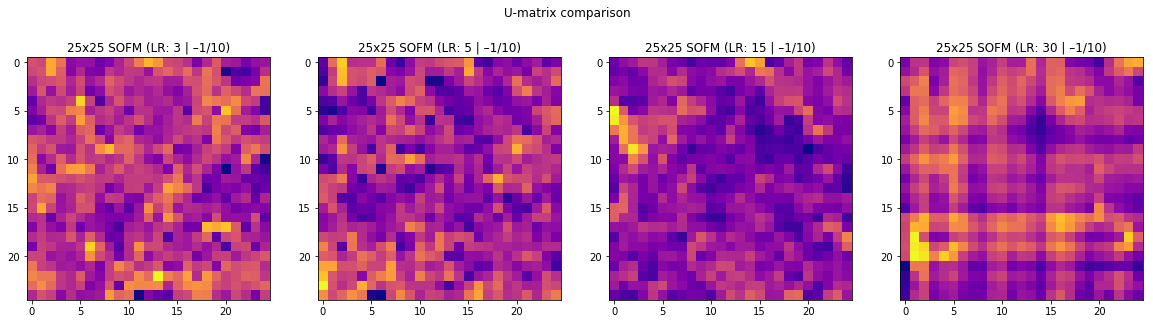

In [105]:
u_matrix_compare(
    sofm_lr3,
    sofm_lr5,
    sofm_lr10,
    sofm_lr15,
    colour_map=cm.plasma,
    show_LR=True)

### The effect of training time (epochs) on a 30x30 model

In this case, we'll be running the same model with the same settings, but for different lengths of time.

In [ ]:
sofm_a = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(30, 30),
    learning_radius=8,
    reduce_radius_after=10,
    step=1.0,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_b = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(30, 30),
    learning_radius=8,
    reduce_radius_after=10,
    step=1.0,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_c = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(30, 30),
    learning_radius=8,
    reduce_radius_after=10,
    step=1.0,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_d = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(30, 30),
    learning_radius=8,
    reduce_radius_after=10,
    step=1.0,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_e = algorithms.SOFM(
    n_inputs=4096,
    features_grid=(30, 30),
    learning_radius=8,
    reduce_radius_after=10,
    step=1.0,
    std=1,
    shuffle_data=True,
    verbose=True,
)

sofm_a.train(faces, epochs=25)
sofm_b.train(faces, epochs=50)
sofm_c.train(faces, epochs=100)
sofm_d.train(faces, epochs=200)
sofm_e.train(faces, epochs=250)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 1.0
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [30, 30]
[OPTION] grid_type = rect
[OPTION] learning_radius = 8
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 1.0
[OPTION] train_end_signal = None
[OPTION] n_inputs = 4096
[OPTION] distance = euclid
[OPTION] features_grid = [30, 30]
[OPTION] grid_type = rect
[OPTION] learning_radius = 8
[OPTION] n_outputs = None
[OPTION] reduce_radius_after = 10
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION

|           7 |     0.10574 |           - |      14 sec |
|           8 |      0.1061 |           - |      14 sec |
|           9 |     0.10458 |           - |      13 sec |
|          10 |     0.10346 |           - |      12 sec |
|          11 |     0.10245 |           - |      12 sec |
|          12 |      0.1025 |           - |      12 sec |
|          13 |     0.10363 |           - |      12 sec |
|          14 |     0.10444 |           - |      12 sec |
|          15 |      0.1034 |           - |      12 sec |
|          16 |     0.10314 |           - |      12 sec |
|          17 |     0.10293 |           - |      12 sec |
|          18 |     0.10313 |           - |      12 sec |
|          19 |     0.10302 |           - |      12 sec |
|          20 |     0.10072 |           - |      10 sec |
|          21 |      0.1006 |           - |      10 sec |
|          22 |    0.099882 |           - |      10 sec |
|          23 |     0.10017 |           - |      10 sec |
|          24 

|          43 |    0.089677 |           - |       8 sec |
|          44 |    0.090943 |           - |       8 sec |
|          45 |    0.091145 |           - |       8 sec |
|          46 |    0.089926 |           - |       8 sec |
|          47 |    0.090272 |           - |       8 sec |
|          48 |    0.090597 |           - |       8 sec |
|          49 |    0.090358 |           - |       8 sec |
|          50 |    0.084594 |           - |       7 sec |
|          51 |    0.084191 |           - |       7 sec |
|          52 |     0.08402 |           - |       7 sec |
|          53 |    0.083027 |           - |       7 sec |
|          54 |     0.08412 |           - |       7 sec |
|          55 |    0.083979 |           - |       7 sec |
|          56 |    0.083677 |           - |       7 sec |
|          57 |     0.08401 |           - |       7 sec |
|          58 |    0.083522 |           - |       7 sec |
|          59 |    0.082977 |           - |       7 sec |
|          60 

|         185 |  0.00051829 |           - |       5 sec |
|         186 |  0.00052906 |           - |       5 sec |
|         187 |  0.00052749 |           - |       5 sec |
|         188 |  0.00052343 |           - |       5 sec |
|         189 |  0.00053191 |           - |       5 sec |
|         190 |  0.00051748 |           - |       5 sec |
|         191 |   0.0005167 |           - |       5 sec |
|         192 |  0.00052237 |           - |       5 sec |
|         193 |  0.00052569 |           - |       5 sec |
|         194 |  0.00052771 |           - |       5 sec |
|         195 |   0.0005241 |           - |       5 sec |
|         196 |  0.00052393 |           - |       5 sec |
|         197 |  0.00051573 |           - |       5 sec |
|         198 |  0.00052384 |           - |       5 sec |
|         199 |  0.00052562 |           - |       5 sec |
|         200 |  0.00051746 |           - |       5 sec |
---------------------------------------------------------


Start traini

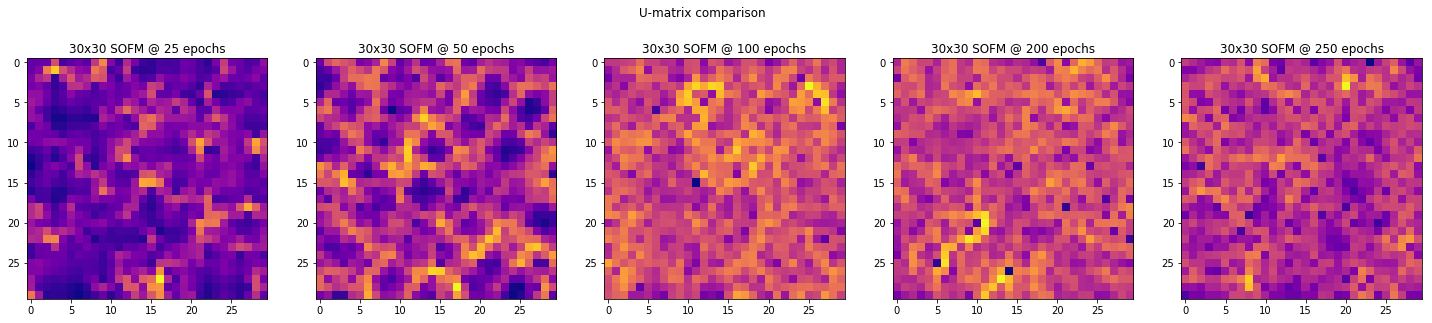

In [136]:
u_matrix_compare(
    sofm_a,
    sofm_b,
    sofm_c,
    sofm_d,
    sofm_e,
    colour_map=cm.plasma,
    show_training_time=True)